In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_rows', None)

In [2]:
nifty= pd.read_csv('NIFTY50_all.csv')

In [3]:
industry =pd.read_csv('stock_metadata.csv')

In [4]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [5]:
nifty['Date']= nifty['Date'].astype('datetime64[ns]')
nifty['Volume']= nifty['Volume'].astype('float64')

In [6]:
temp= nifty[nifty['Deliverable Volume'].isnull()]
temp.groupby('Symbol').size().sort_values(ascending=False)

Symbol
SUNPHARMA     528
HINDALC0      520
ZEETELE       519
ICICIBANK     517
HINDLEVER     515
CIPLA         514
TITAN         514
SBIN          514
RELIANCE      514
ITC           514
SESAGOA       513
TISCO         509
TELCO         509
UTIBANK       509
ONGC          509
M&M           509
WIPRO         509
INFOSYSTCH    509
ASIANPAINT    509
IOC           509
HEROHONDA     509
BPCL          509
HDFCBANK      509
BRITANNIA     509
HDFC          509
GRASIM        509
DRREDDY       509
EICHERMOT     504
HCLTECH       503
BAJAUTOFIN    446
KOTAKMAH      195
INDUSINDBK    188
SHREECEM      188
GAIL          188
BHARTI         11
UNIPHOS         6
TATAMOTORS      5
TATASTEEL       5
HINDALCO        5
BHARTIARTL      5
MARUTI          1
KOTAKBANK       1
dtype: int64

We have a lot of missing values in the Trades column whereas all other columns are fully complete except the 'Deliverable volume' column.


In [7]:
nifty.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


<AxesSubplot:xlabel='Turnover'>

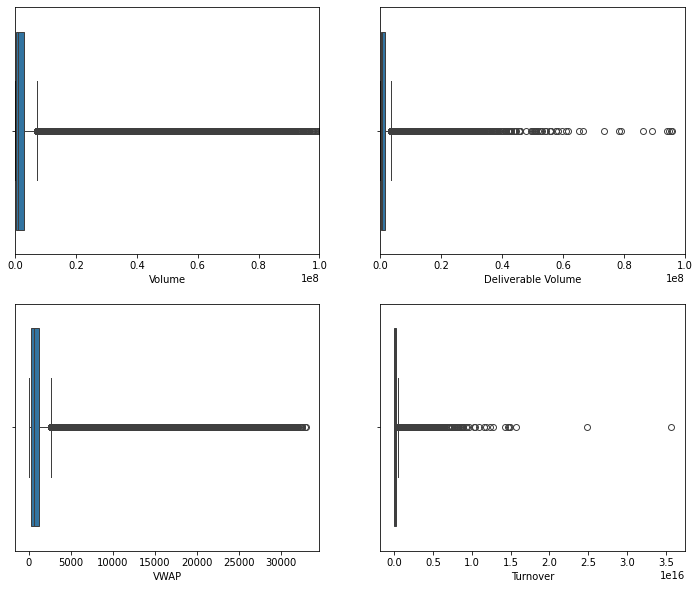

In [8]:
fig,axes= plt.subplots(nrows=2,ncols=2,figsize=(12,10))
sns.boxplot(ax=axes[0,0],data= nifty, x="Volume")
axes[0, 0].set_xlim(0, 100000000)
axes[0, 1].set_xlim(0, 100000000)
sns.boxplot(ax=axes[0,1],data= nifty, x="Deliverable Volume")
sns.boxplot(ax=axes[1,0],data= nifty, x="VWAP")
sns.boxplot(ax=axes[1,1],data= nifty, x="Turnover")

All columns have huge deviations in their data  due to the scattered stock prices across years.The columns are heavily skewed to the left.It is to note that volume has a greater deviation than the deliverable volume.It gives us an idea that the growth of the price of stock is a gradual one and the latter spikes are huge.



In [9]:
nifty['Symbol'].value_counts()

IOC           5306
CIPLA         5306
M&M           5306
ICICIBANK     5306
ONGC          5306
RELIANCE      5306
SBIN          5306
HDFCBANK      5306
HDFC          5306
GRASIM        5306
DRREDDY       5306
SUNPHARMA     5306
ITC           5306
ASIANPAINT    5306
WIPRO         5306
TITAN         5306
BPCL          5306
BRITANNIA     5305
EICHERMOT     5301
HCLTECH       5300
SHREECEM      4985
INDUSINDBK    4985
GAIL          4985
KOTAKBANK     4483
MARUTI        4427
TATAMOTORS    4307
LT            4184
ULTRACEMCO    4140
TCS           4139
NTPC          4088
JSWSTEEL      3871
TATASTEEL     3851
BHARTIARTL    3685
TECHM         3635
ZEEL          3510
SESAGOA       3435
HINDUNILVR    3413
AXISBANK      3394
HINDALCO      3387
POWERGRID     3359
BAJAJ-AUTO    3202
BAJAJFINSV    3201
HEROHONDA     2898
INFOSYSTCH    2870
NESTLEIND     2806
BAJFINANCE    2624
BAJAUTOFIN    2611
COALINDIA     2598
INFY          2436
UNIPHOS       2429
HEROMOTOCO    2408
ADANIPORTS    2299
HINDALC0    

There are many comapnies which changed names or merged later on which have not been edited in the dataset.



In [10]:
nifty['Symbol']=nifty['Symbol'].replace('MUNDRAPORT','ADANIPORTS')
nifty['Symbol']=nifty['Symbol'].replace('JSWSTL','JSWSTEEL')
nifty['Symbol']=nifty['Symbol'].replace('SSLT','UPL')
nifty['Symbol']=nifty['Symbol'].replace('JSWSTL','JSWSTEEL')
nifty['Symbol']=nifty['Symbol'].replace('TELCO','TATAMOTORS')
nifty['Symbol']=nifty['Symbol'].replace('TISCO','TATASTEEL')
nifty['Symbol']=nifty['Symbol'].replace('KOTAKMAH','KOTAKBANK')
nifty['Symbol']=nifty['Symbol'].replace('BHARTI','BHARTIARTL')
nifty['Symbol']=nifty['Symbol'].replace('SESAGOA','UPL')
nifty['Symbol']=nifty['Symbol'].replace('UNIPHOS','UPL')
nifty['Symbol']=nifty['Symbol'].replace('HINDLEVER','HINDUNILVR')
nifty['Symbol']=nifty['Symbol'].replace('UTIBANK','AXISBANK')
nifty['Symbol']=nifty['Symbol'].replace('HINDALC0','HINDALCO')
nifty['Symbol']=nifty['Symbol'].replace('HEROHONDA','HEROMOTOCO')
nifty['Symbol']=nifty['Symbol'].replace('INFOSYSTCH','INFY')
nifty['Symbol']=nifty['Symbol'].replace('BAJAUTOFIN','BAJFINANCE')
nifty['Symbol']=nifty['Symbol'].replace('ZEETELE','ZEEL')



In [11]:
nifty['Symbol'].nunique()

49

We now have the 49 unique companies in the dataset.

In [12]:

nifty['Closing_price_yesterday'] = nifty['Close'].shift(+1)
nifty['Gain/Loss']= nifty['Close']- nifty['Closing_price_yesterday']




In [13]:
nifty.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Closing_price_yesterday,Gain/Loss
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612,NaN,NaN
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172,962.90,-69.00
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088,893.90,-9.70
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735,884.20,37.35
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741,921.55,47.75


In [14]:
nifty["Year"]= nifty['Date'].dt.year
nifty["Month"]= nifty['Date'].dt.month_name()
nifty['Day']= nifty['Date'].dt.day_name()

In [15]:
nifty.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Closing_price_yesterday,Gain/Loss,Year,Month,Day
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612,NaN,NaN,2007,November,Tuesday
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172,962.90,-69.00,2007,November,Wednesday
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088,893.90,-9.70,2007,November,Thursday
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735,884.20,37.35,2007,November,Friday
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741,921.55,47.75,2007,December,Monday


In [16]:
#For the first occurance, the prev close values were invalid, so to convert them to Null values:

first_occurrence = nifty.groupby('Symbol').head(1).index
nifty.loc[first_occurrence, 'Prev Close'] = np.nan


In [17]:
nifty= nifty.merge(industry,how='left',on='Symbol')


In [18]:
nifty.drop(columns=['Company Name','Series_y','ISIN Code'],inplace=True)

In [19]:
nifty[nifty['Industry'].isnull()]

,Date,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,Closing_price_yesterday,Gain/Loss,Year,Month,Day,Industry


In [20]:
nifty.groupby(['Symbol', 'Industry'])['Industry']



In [21]:
result = nifty.groupby(['Symbol', 'Industry']).size().reset_index(name='Industry_Count')
result.groupby('Industry').size().reset_index(name='Symbol_Count').sort_values(by='Symbol_Count', ascending=False)


,Industry,Symbol_Count
6,FINANCIAL SERVICES,9
4,ENERGY,7
0,AUTOMOBILE,6
3,CONSUMER GOODS,6
7,IT,5
9,METALS,5
1,CEMENT & CEMENT PRODUCTS,3
10,PHARMA,3
2,CONSTRUCTION,1
5,FERTILISERS & PESTICIDES,1


In [22]:
nifty.groupby('Industry')['Turnover'].mean().reset_index(name='Average_Turnover')


,Industry,Average_Turnover
0,AUTOMOBILE,1.475192e+14
1,CEMENT & CEMENT PRODUCTS,4.618627e+13
2,CONSTRUCTION,2.644572e+14
3,CONSUMER GOODS,9.415630e+13
4,ENERGY,1.701448e+14
5,FERTILISERS & PESTICIDES,6.931796e+13
6,FINANCIAL SERVICES,2.451209e+14
7,IT,2.036079e+14
8,MEDIA & ENTERTAINMENT,1.249096e+14
9,METALS,1.707420e+14


In [23]:
nifty.head()

,Date,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,Closing_price_yesterday,Gain/Loss,Year,Month,Day,Industry
0,2007-11-27,ADANIPORTS,EQ,NaN,770.00,1050.00,770.0,959.0,962.90,984.72,...,2.687719e+15,NaN,9859619.0,0.3612,NaN,NaN,2007,November,Tuesday,SERVICES
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,4.312765e+14,NaN,1453278.0,0.3172,962.90,-69.00,2007,November,Wednesday,SERVICES
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,4.550658e+14,NaN,1069678.0,0.2088,893.90,-9.70,2007,November,Thursday,SERVICES
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,4.283257e+14,NaN,1260913.0,0.2735,884.20,37.35,2007,November,Friday,SERVICES
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,2.875200e+14,NaN,816123.0,0.2741,921.55,47.75,2007,December,Monday,SERVICES


In [24]:
top20_turnovers = nifty.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head(25).index
top20_turnovers

Index(['RELIANCE', 'SBIN', 'INFY', 'ICICIBANK', 'TATAMOTORS', 'AXISBANK',
       'TATASTEEL', 'HDFC', 'HDFCBANK', 'TCS', 'LT', 'BHARTIARTL', 'MARUTI',
       'ITC', 'BAJFINANCE', 'INDUSINDBK', 'SUNPHARMA', 'HINDUNILVR',
       'KOTAKBANK', 'ZEEL', 'ONGC', 'M&M', 'HCLTECH', 'UPL', 'HINDALCO'],
      dtype='object', name='Symbol')

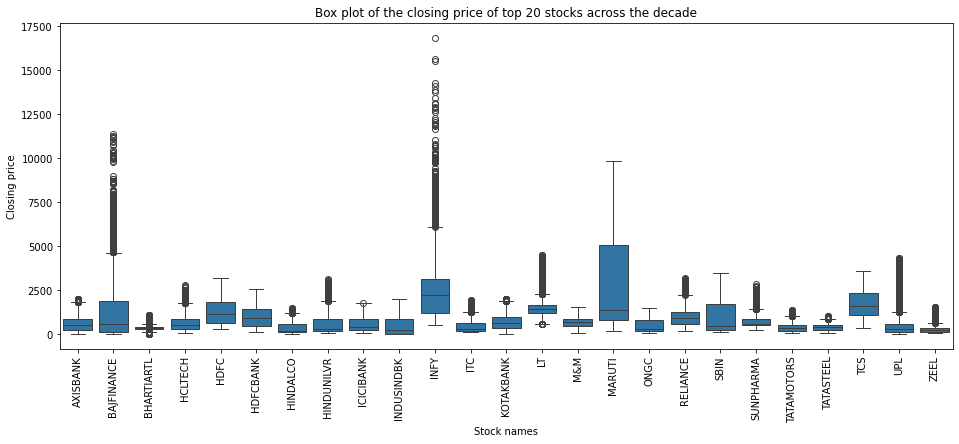

In [25]:
plt.figure(figsize=(16,6))

sns.boxplot(data=nifty[nifty['Symbol'].isin(top20_turnovers)],x='Symbol',y='Close')
plt.title('Box plot of the closing price of top 20 stocks across the decade')
plt.xlabel('Stock names')
plt.ylabel('Closing price')
plt.xticks(rotation=90)
plt.show()

Infosys seems to have a huge variability in its stock value from the amount of outliers including bajaj finance. Most of the stocks have a normalised boxplot though a few like Maruti, SBI have it skewed to the lower end.

Q. Plot the line graphs of top 5 comapnies with highest turnovers

In [26]:
top_5 = nifty.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head().index
top_5


Index(['RELIANCE', 'SBIN', 'INFY', 'ICICIBANK', 'TATAMOTORS'], dtype='object', name='Symbol')

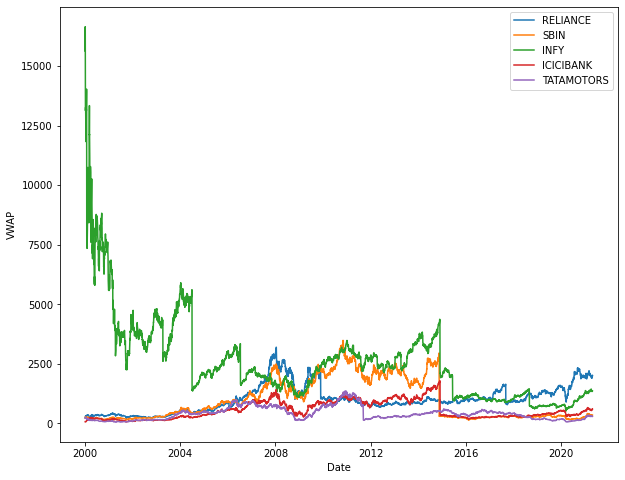

In [27]:
plt.figure(figsize=(10,8))
for i in top_5:
 temp= nifty[nifty['Symbol']==i]
 plt.plot(temp['Date'],temp['VWAP'],label=i)
 plt.legend()
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()

Q. How did the top 5 companies(by turnover) fare during the first covid phase?

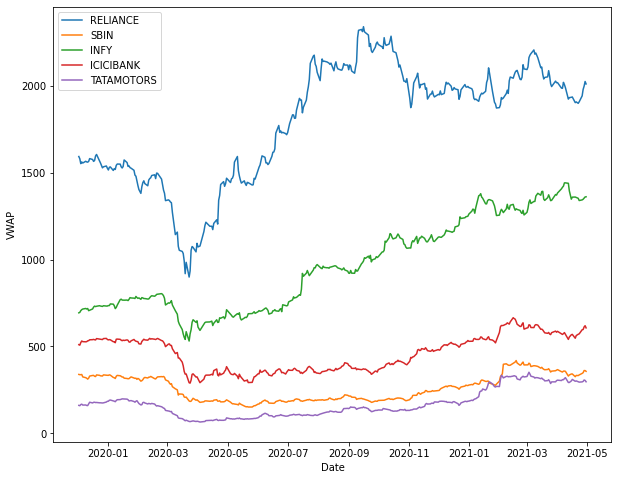

In [28]:
nifty_covid= nifty[nifty["Date"]> "2019-12-01"]
plt.figure(figsize=(10,8))
for i in top_5:
 temp= nifty_covid[nifty_covid['Symbol']==i]
 plt.plot(temp['Date'],temp['VWAP'],label=i)
 plt.legend()
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()

Q. Which of the 50 comapnies were affected the most during Covid

In [29]:
set2020= nifty[nifty["Date"]=="2020-01-01"].sort_values('VWAP',ascending=False)[["Symbol","Close"]].set_index("Symbol")
set2021= nifty[nifty["Date"]=="2021-01-01"].sort_values('VWAP',ascending=False)[["Symbol","Close"]].set_index("Symbol")

In [30]:
gap = pd.DataFrame(index=set2021.index)
gap['CloseDiff']= abs(set2020['Close']-set2021['Close'])
top_covid_affected_companies= gap.sort_values(by='CloseDiff',ascending=False).head(10).index

In [31]:
gap.sort_values(by='CloseDiff',ascending=False).head(10)

,CloseDiff
Symbol,
EICHERMOT,19533.10
NESTLEIND,3671.65
SHREECEM,3630.40
DRREDDY,2361.95
ULTRACEMCO,1225.80
BAJFINANCE,1048.85
ASIANPAINT,982.35
TCS,760.65
HEROMOTOCO,670.10


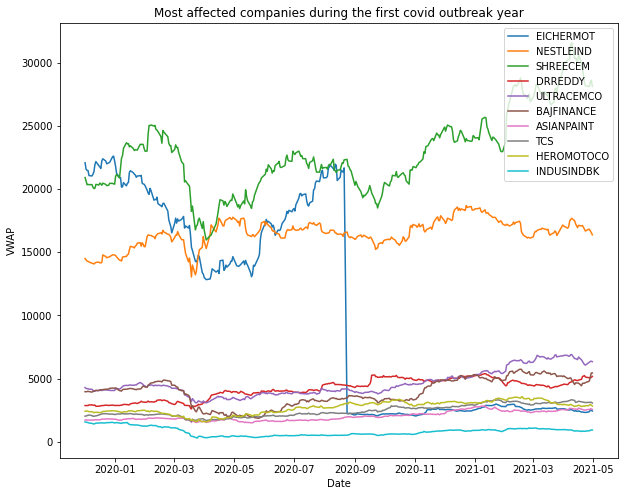

In [32]:

plt.figure(figsize=(10,8))
for i in top_covid_affected_companies:
 temp= nifty_covid[nifty_covid['Symbol']==i]
 plt.plot(temp['Date'],temp['VWAP'],label=i)
 plt.legend()
plt.title('Most affected companies during the first covid outbreak year')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()

Shree cement limited and Nestle India's shares were the most profitable among the 50 companies during the 2020 covid year, while Eicher Motors had a drastic fall of almost 20K in share prices.

Q. How did the IT companies fare against each other ?

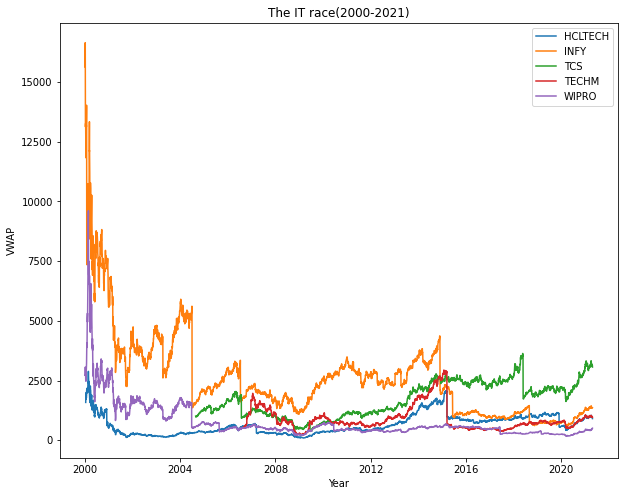

In [33]:
IT= nifty[nifty["Industry"]=="IT"]["Symbol"].unique()
plt.figure(figsize=(10,8))
for i in IT:
 temp= nifty[nifty['Symbol']==i]
 plt.plot(temp['Date'],temp['VWAP'],label=i)
 plt.legend()
plt.title('The IT race(2000-2021)')
plt.xlabel('Year')
plt.ylabel('VWAP')
plt.legend()


According to the dataset, Infosys was supremely ahead of the race until 2015 while TCS is now much above the others in the stock market, while Wipro has the lowest VWAP amongst the 5.

Performance sectorwise :

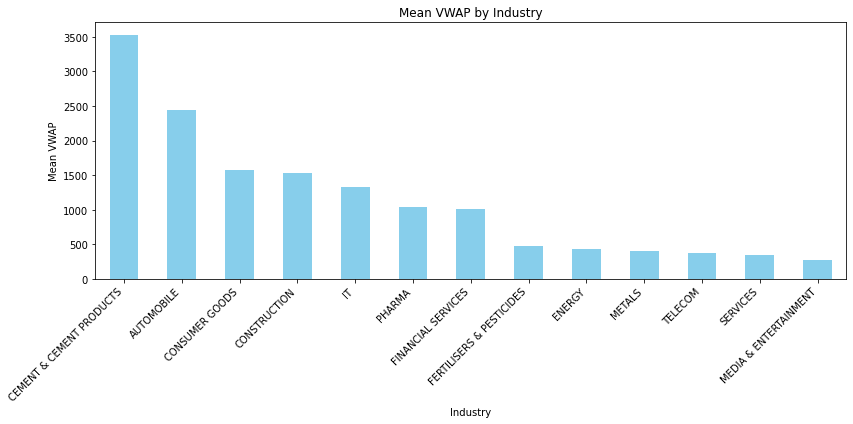

In [34]:
import matplotlib.pyplot as plt

grouped_industries = nifty.groupby('Industry')

mean_vwap_by_industry = grouped_industries['VWAP'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
mean_vwap_by_industry.plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Mean VWAP')
plt.title('Mean VWAP by Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
nifty.head()

In [ ]:
nifty.to_csv()